In [11]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate
from scipy import optimize

For this homework, we are putting together what we learned in class. A lot of this code was thus written by Prof. Kristjan Haule and can be found at https://www.physics.rutgers.edu/grad/509/04_Scipy_Hydrogen_atom.html 

Here I stitch together the functions from class to find the charge densities of nickel, uranium, and plutonium.

In [12]:
def Numerovc(f, x0, dx, dh):
    """Given precomputed function f(x), solves for x(t), which satisfies:
          x''(t) = f(t) x(t)
          dx = (dx(t)/dt)_{t=0}
          x0 = x(t=0)
    """
    x = np.zeros(len(f))
    x[0] = x0
    x[1] = x0+dh*dx
    h2 = dh**2
    h12 = h2/12.
    w0=x0*(1-h12*f[0])
    w1=x[1]*(1-h12*f[1])
    xi = x[1]
    fi = f[1]
    for i in range(2,f.size):
        w2 = 2*w1-w0+h2*fi*xi  # here fi,xi=f1,x1 at the first step
        fi = f[i]              # at this point fi=f2 in the first step
        xi = w2/(1-h12*fi)     # xi is not x2 in the first step
        x[i]=xi                # save x2 into x[2]
        w0,w1 = w1,w2
    return x

In [13]:
def fSchrod(En, l, R):
    return l*(l+1.)/R**2-2./R-En

def ComputeSchrod(En,R,l):
    "Computes Schrod Eq." 
    f = fSchrod(En,l,R[::-1])
    ur = Numerovc(f,0.0,-1e-7,-R[1]+R[0])[::-1]
    norm = integrate.simpson(ur**2,x=R)
    return ur*1/np.sqrt(abs(norm))

def Shoot(En,R,l):
    ur = ComputeSchrod(En,R,l)
    ur = ur/R**l
    f0,f1 = ur[0],ur[1]
    f_at_0 = f0 + (f1-f0)*(0.0-R[0])/(R[1]-R[0])
    
    return f_at_0

def Shoot2(En,R,l):
    ur = ComputeSchrod(En,R,l)
    ur = ur/R**l
    poly = np.polyfit(R[:4], ur[:4], deg=3)
    
    return np.polyval(poly, 0.0)

In [14]:
def FindBoundStates(R,l,nmax,Esearch):
    """ R       -- real space mesh
        l       -- orbital quantum number
        nmax    -- maximum number of bounds states we require
        Esearch -- energy mesh, which brackets all bound-states, i.e., every sign change of the wave function at u(0).
    """
    n=0
    Ebnd=[]                     # save all bound states
    u0 = Shoot2(Esearch[0],R,l)  # u(r=0) for the first energy Esearch[0]
    for i in range(1,len(Esearch)):
        u1 = Shoot2(Esearch[i],R,l) # evaluate u(r=0) and all Esearch points
        
        if u0*u1<0:
            Ebound = optimize.brentq(Shoot2,Esearch[i-1],Esearch[i],xtol=1e-16,args=(R,l)) # root finding routine
            Ebnd.append((l,Ebound))
            if len(Ebnd)>nmax: break
            n+=1
            print(f"Found bound state at E={Ebound:14.9f} E_exact={-1.0/(n+l)**2:14.9f} l={l}")
        u0=u1
    
    return Ebnd

In [15]:
R = np.linspace(1e-6,100,2000)
Esearch = -1.2/np.arange(1,20,0.2)**2
nmax=7

Bnd=[]
for l in range(nmax-1):
    Bnd += FindBoundStates(R,l,nmax-l,Esearch)

def cmpKey(x):
    return x[1] + x[0]/10000.  # energy has large wait, but degenerate energy states are sorted by l
Bnd

Found bound state at E=  -0.999999943 E_exact=  -1.000000000 l=0
Found bound state at E=  -0.249999990 E_exact=  -0.250000000 l=0
Found bound state at E=  -0.111111108 E_exact=  -0.111111111 l=0
Found bound state at E=  -0.062499999 E_exact=  -0.062500000 l=0
Found bound state at E=  -0.039999942 E_exact=  -0.040000000 l=0
Found bound state at E=  -0.027736955 E_exact=  -0.027777778 l=0
Found bound state at E=  -0.019192750 E_exact=  -0.020408163 l=0
Found bound state at E=  -0.249999998 E_exact=  -0.250000000 l=1
Found bound state at E=  -0.111111111 E_exact=  -0.111111111 l=1
Found bound state at E=  -0.062500000 E_exact=  -0.062500000 l=1
Found bound state at E=  -0.039999957 E_exact=  -0.040000000 l=1
Found bound state at E=  -0.027743635 E_exact=  -0.027777778 l=1
Found bound state at E=  -0.019306319 E_exact=  -0.020408163 l=1
Found bound state at E=  -0.111111111 E_exact=  -0.111111111 l=2
Found bound state at E=  -0.062500000 E_exact=  -0.062500000 l=2
Found bound state at E=  

[(0, -0.9999999428188503),
 (0, -0.24999998998161935),
 (0, -0.1111111083553681),
 (0, -0.062499998887509824),
 (0, -0.0399999424527735),
 (0, -0.027736955141154908),
 (0, -0.01919274969626267),
 (0, -0.00932567350071449),
 (1, -0.24999999797145778),
 (1, -0.11111111057681727),
 (1, -0.06249999979663574),
 (1, -0.03999995716364918),
 (1, -0.02774363509360803),
 (1, -0.01930631916632847),
 (1, -0.009689237030477674),
 (2, -0.11111111114690182),
 (2, -0.06250000002526973),
 (2, -0.03999997685245823),
 (2, -0.027754396683880127),
 (2, -0.019511901593584437),
 (2, -0.010375117855665696),
 (3, -0.06250000000087222),
 (3, -0.03999999177696002),
 (3, -0.027765321471830508),
 (3, -0.019769892200455292),
 (3, -0.011307834521506698),
 (4, -0.03999999854507874),
 (4, -0.027773149995453304),
 (4, -0.020029573249010658),
 (4, -0.012387464538713682),
 (5, -0.027776874654621815),
 (5, -0.02023999119829015),
 (5, -0.013496871181705459)]

In [16]:
def calcChargeDensity(Z):
    N=0
    R = np.linspace(1e-6,100,2000)
    rho=np.zeros(len(R))
    for (l,En) in Bnd:
        ur = ComputeSchrod(En,R,l)
        dN = 2*(2*l+1) # each radial function can store these many electrons
        if N+dN<=Z:
            ferm = 1.  # no fractional occupancy needed
        else:
            ferm = (Z-N)/float(dN)  # fractional occupancy, because the orbital is not fully filled
        drho = ur**2 * ferm * dN/(4*np.pi*R**2) # charge density per solid angle per radius: drho/(dOmega*dr)
        rho += drho
        N += dN
        print(f'adding state ({l:2d},{En:14.9f}) with fermi={ferm:4.2f} and current N={N:5.1f}')
        if N>=Z: break
    return rho

In [17]:
rho_nickel = calcChargeDensity(28)
rho_uranium = calcChargeDensity(92)
rho_plutonium = calcChargeDensity(94)

adding state ( 0,  -0.999999943) with fermi=1.00 and current N=  2.0
adding state ( 0,  -0.249999990) with fermi=1.00 and current N=  4.0
adding state ( 0,  -0.111111108) with fermi=1.00 and current N=  6.0
adding state ( 0,  -0.062499999) with fermi=1.00 and current N=  8.0
adding state ( 0,  -0.039999942) with fermi=1.00 and current N= 10.0
adding state ( 0,  -0.027736955) with fermi=1.00 and current N= 12.0
adding state ( 0,  -0.019192750) with fermi=1.00 and current N= 14.0
adding state ( 0,  -0.009325674) with fermi=1.00 and current N= 16.0
adding state ( 1,  -0.249999998) with fermi=1.00 and current N= 22.0
adding state ( 1,  -0.111111111) with fermi=1.00 and current N= 28.0
adding state ( 0,  -0.999999943) with fermi=1.00 and current N=  2.0
adding state ( 0,  -0.249999990) with fermi=1.00 and current N=  4.0
adding state ( 0,  -0.111111108) with fermi=1.00 and current N=  6.0
adding state ( 0,  -0.062499999) with fermi=1.00 and current N=  8.0
adding state ( 0,  -0.039999942) w

Text(0.5, 0.98, 'charge density')

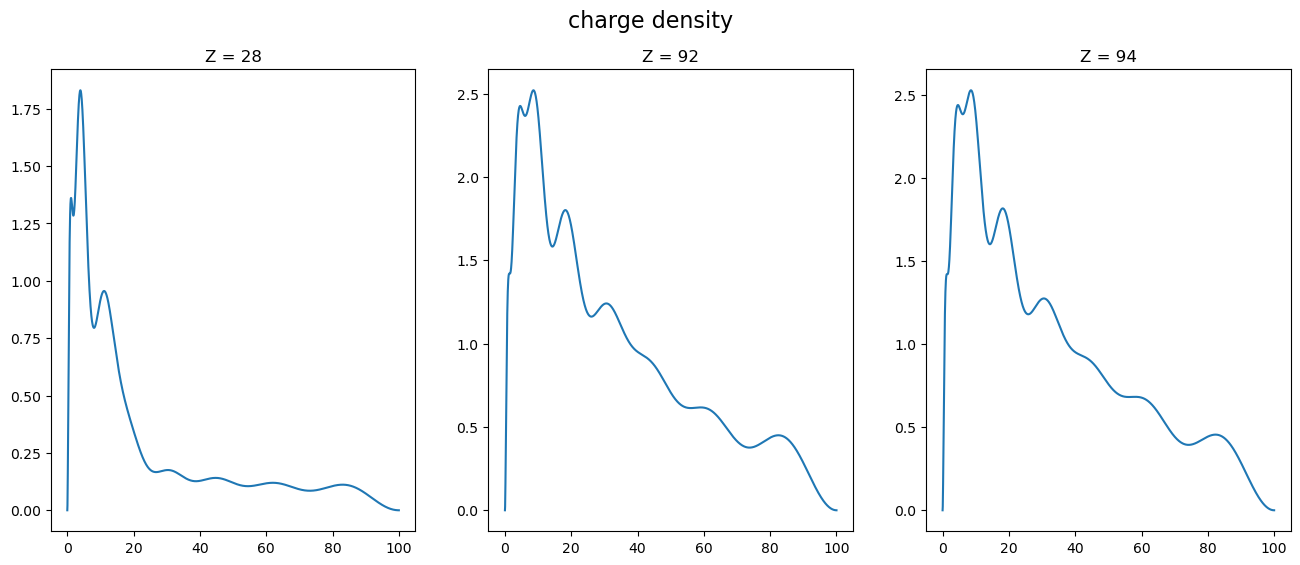

In [18]:
fig, axs = plt.subplots(1, 3, figsize=(16, 6))

axs[0].plot(R, rho_nickel*4*np.pi*R**2, label='nickel')
axs[1].plot(R, rho_uranium*4*np.pi*R**2, label='uranium')
axs[2].plot(R, rho_plutonium*4*np.pi*R**2, label='plutonium')

axs[0].set_title('Z = 28')
axs[1].set_title('Z = 92')
axs[2].set_title('Z = 94')

fig.suptitle('charge density', fontsize=16)